# Sinusoidal experiments

In [1]:
import sys
import os
cwd = os.getcwd()
ind = cwd.rfind('\\')
addpath = cwd[:ind]
sys.path.append(addpath)
from tensorflow import keras
from data_gen import WaveGenerator
import matplotlib.pyplot as plt
import numpy as np

## Waveforms

In [9]:
plt.rcParams['figure.figsize'] = (16,6)

Text(0.5, 1.0, 'Sinusoid')

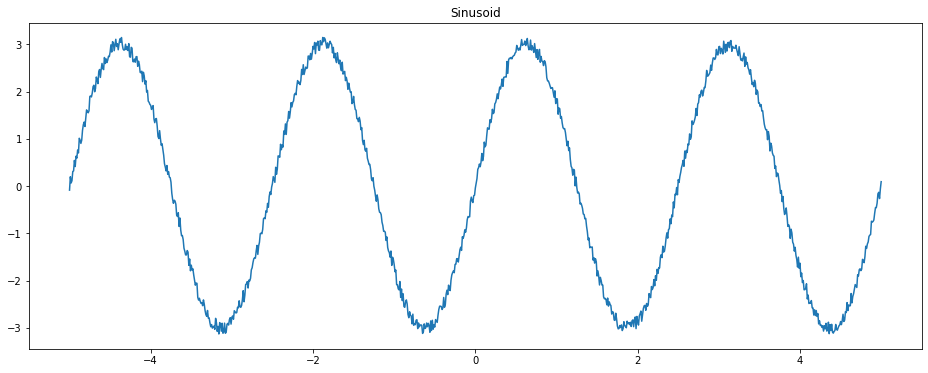

In [33]:
genny = WaveGenerator(waveform=WaveGenerator.WaveType.SINUSOID,
                      data_range=(-5,5),
                      periodicity=2.5,
                      amplitude=3,
                      noise_percent=0.05)
noisy_x, noisy_y = genny.data_generation()
plt.plot(noisy_x, noisy_y)
plt.title('Sinusoid')

Text(0.5, 1.0, 'Sawtooth')

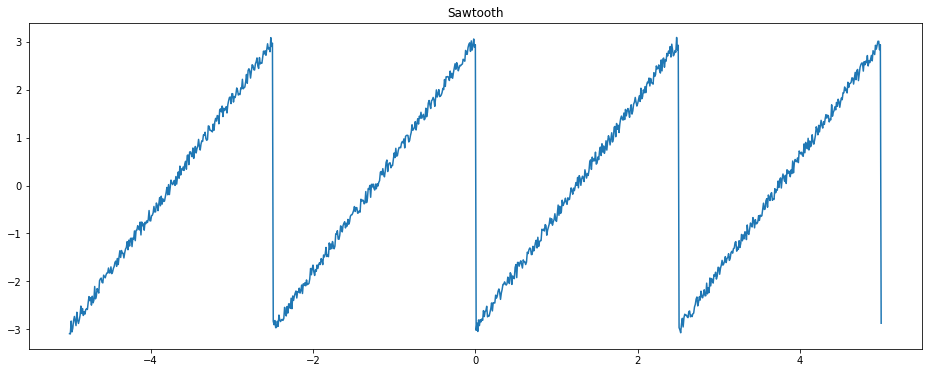

In [25]:
genny = WaveGenerator(waveform=WaveGenerator.WaveType.SAWTOOTH,
                      data_range=(-5,5),
                      periodicity=2.5,
                      amplitude=3,
                      noise_percent=0.05)
noisy_x, noisy_y = genny.data_generation()
plt.plot(noisy_x, noisy_y)
plt.title('Sawtooth')

Text(0.5, 1.0, 'Square')

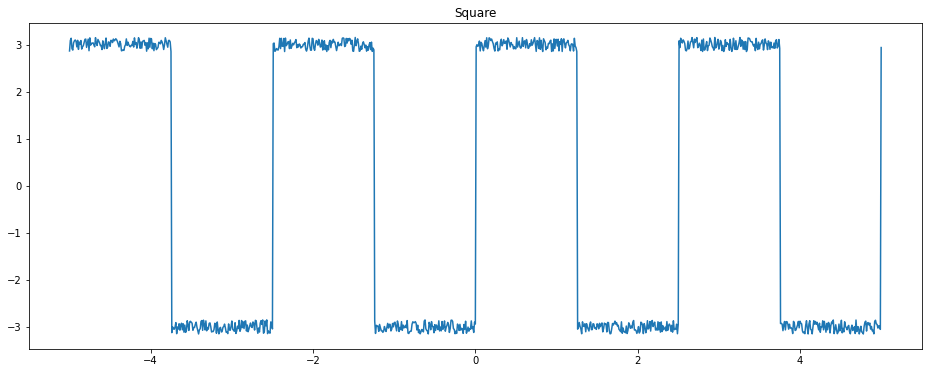

In [14]:
genny = WaveGenerator(waveform=WaveGenerator.WaveType.SQUARE,
                      data_range=(-5,5),
                      periodicity=2.5,
                      amplitude=3,
                      noise_percent=0.05)
noisy_x, noisy_y = genny.data_generation()
plt.plot(noisy_x, noisy_y)
plt.title('Square')

Text(0.5, 1.0, 'Triangle')

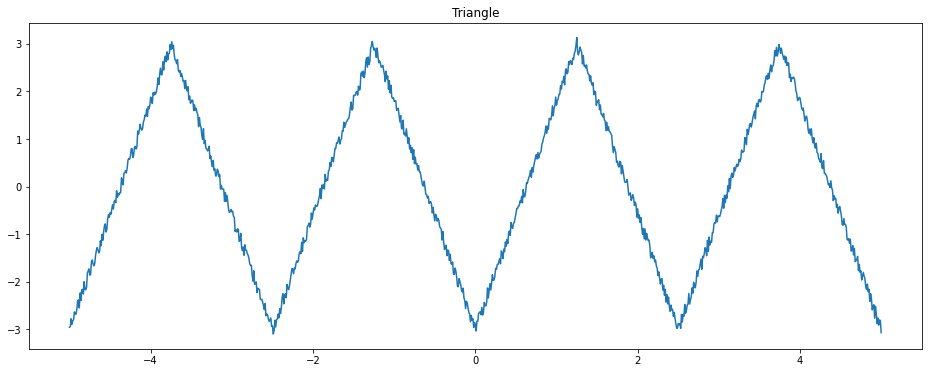

In [27]:
genny = WaveGenerator(waveform=WaveGenerator.WaveType.TRIANGLE,
                      data_range=(-5,5),
                      periodicity=2.5,
                      amplitude=3,
                      noise_percent=0.05)
noisy_x, noisy_y = genny.data_generation()
plt.plot(noisy_x, noisy_y)
plt.title('Triangle')

## generate data

In [2]:
generator = WaveGenerator(waveform=WaveGenerator.WaveType.SINUSOID,
                          data_range=(-5,5),
                          periodicity=2.5,
                          amplitude=3,
                          noise_percent=0.05,
                         )
noisy_x, noisy_y = generator.data_generation()

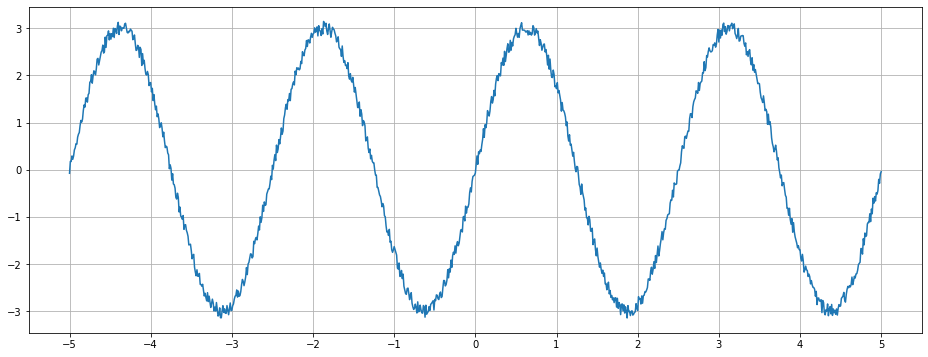

In [3]:
plt.rcParams['figure.figsize'] = (16,6)
_ = plt.plot(noisy_x, noisy_y)
plt.grid()
_ = plt.xticks(np.linspace(-5,5,11))

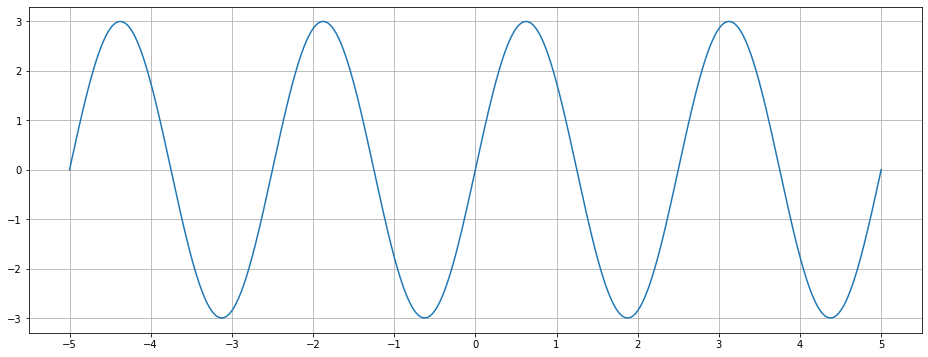

In [4]:
generator.noise_percent = 0
clean_x, clean_y = generator.data_generation()
_ = plt.plot(clean_x, clean_y)
plt.grid()
_ = plt.xticks(np.linspace(-5,5,11))

so how do they look together?


Text(0.5, 1.0, 'generated sinusoids')

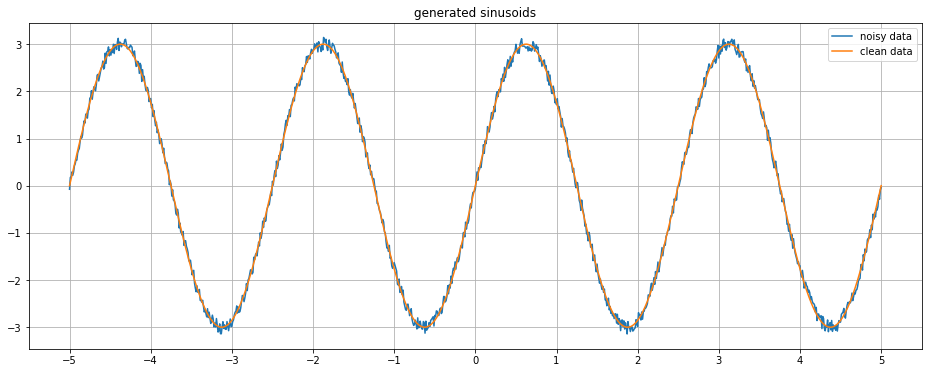

In [5]:
plt.plot(noisy_x, noisy_y, label='noisy data')
plt.plot(clean_x, clean_y, label='clean data')
plt.grid()
_ = plt.xticks(np.linspace(-5, 5, 11))
plt.legend()
plt.title('generated sinusoids')

## simple NN prediction

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [7]:
mlp = Sequential()
mlp.add(Dense(100, activation='relu', input_shape = (1,)))
for _ in range(20):
    mlp.add(Dense(100, activation = 'relu'))
mlp.add(Dense(1, activation='linear'))
mlp.compile(loss='mse',
            metrics = ['mae'])

In [8]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

In [9]:
history = mlp.fit (x=noisy_x, y=noisy_y,epochs = 5000)

Epoch 1/5000
32/32 [==============================] - 1s 2ms/step - loss: 4.5701 - mae: 1.9119
Epoch 2/5000
32/32 [==============================] - 0s 2ms/step - loss: 4.4204 - mae: 1.8700
Epoch 3/5000
32/32 [==============================] - 0s 2ms/step - loss: 4.3512 - mae: 1.8425
Epoch 4/5000
32/32 [==============================] - 0s 2ms/step - loss: 4.0057 - mae: 1.7358
Epoch 5/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.7264 - mae: 1.6381
Epoch 6/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.6093 - mae: 1.5988
Epoch 7/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.5867 - mae: 1.5942
Epoch 8/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.4418 - mae: 1.5415
Epoch 9/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.3081 - mae: 1.4915
Epoch 10/5000
32/32 [==============================] - 0s 2ms/step - loss: 3.0715 - mae: 1.4198
Epoch 11/5000
32/32 [============================

32/32 [==============================] - 0s 2ms/step - loss: 0.3749 - mae: 0.4515
Epoch 87/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.4359 - mae: 0.4656
Epoch 88/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.4356 - mae: 0.4826
Epoch 89/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.3246 - mae: 0.3894
Epoch 90/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.3396 - mae: 0.4048
Epoch 91/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.4004 - mae: 0.4569
Epoch 92/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.3880 - mae: 0.4458
Epoch 93/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.4157 - mae: 0.4333
Epoch 94/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.3769 - mae: 0.4301
Epoch 95/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.3559 - mae: 0.4022
Epoch 96/5000
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.2357 - mae: 0.3445
Epoch 171/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.2192 - mae: 0.3261
Epoch 172/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.2215 - mae: 0.3369
Epoch 173/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1966 - mae: 0.3216
Epoch 174/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1876 - mae: 0.2886
Epoch 175/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.2093 - mae: 0.3024
Epoch 176/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.2279 - mae: 0.3333
Epoch 177/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1760 - mae: 0.3013
Epoch 178/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.2005 - mae: 0.3114
Epoch 179/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1985 - mae: 0.3124
Epoch 180/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.2700
Epoch 255/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1405 - mae: 0.2576
Epoch 256/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1106 - mae: 0.2340
Epoch 257/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1723 - mae: 0.2922
Epoch 258/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1275 - mae: 0.2401
Epoch 259/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1441 - mae: 0.2672
Epoch 260/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1490 - mae: 0.2587
Epoch 261/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1520 - mae: 0.2734
Epoch 262/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1284 - mae: 0.2463
Epoch 263/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1641 - mae: 0.2867
Epoch 264/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.1193 - mae: 0.2437
Epoch 339/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1027 - mae: 0.2196
Epoch 340/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1272 - mae: 0.2442
Epoch 341/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1252 - mae: 0.2334
Epoch 342/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1179 - mae: 0.2365
Epoch 343/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1049 - mae: 0.2320
Epoch 344/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1159 - mae: 0.2285
Epoch 345/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1113 - mae: 0.2349
Epoch 346/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0914 - mae: 0.2133
Epoch 347/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1275 - mae: 0.2432
Epoch 348/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0891 - mae: 0.2092
Epoch 423/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0925 - mae: 0.2153
Epoch 424/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0961 - mae: 0.2203
Epoch 425/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0667 - mae: 0.1838
Epoch 426/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1008 - mae: 0.2229
Epoch 427/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.1980
Epoch 428/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.1005 - mae: 0.2292
Epoch 429/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0923 - mae: 0.2136
Epoch 430/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0841 - mae: 0.1987
Epoch 431/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0765 - mae: 0.1949
Epoch 432/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0755 - mae: 0.1992
Epoch 507/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0677 - mae: 0.1767
Epoch 508/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0833 - mae: 0.2060
Epoch 509/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0730 - mae: 0.1913
Epoch 510/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0911 - mae: 0.1982
Epoch 511/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0657 - mae: 0.1835
Epoch 512/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0823 - mae: 0.1991
Epoch 513/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0827 - mae: 0.2038
Epoch 514/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0690 - mae: 0.1885
Epoch 515/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0796 - mae: 0.2063
Epoch 516/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0765 - mae: 0.1913
Epoch 591/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0715 - mae: 0.1808
Epoch 592/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0637 - mae: 0.1776
Epoch 593/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0697 - mae: 0.1855
Epoch 594/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0709 - mae: 0.1868
Epoch 595/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0688 - mae: 0.1839
Epoch 596/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0567 - mae: 0.1635
Epoch 597/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0699 - mae: 0.1828
Epoch 598/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0715 - mae: 0.1909
Epoch 599/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0675 - mae: 0.1797
Epoch 600/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0564 - mae: 0.1750
Epoch 675/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0711 - mae: 0.1927
Epoch 676/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0577 - mae: 0.1714
Epoch 677/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0639 - mae: 0.1746
Epoch 678/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0604 - mae: 0.1726
Epoch 679/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0533 - mae: 0.1620
Epoch 680/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0555 - mae: 0.1751
Epoch 681/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0720 - mae: 0.1871
Epoch 682/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0650 - mae: 0.1748
Epoch 683/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0538 - mae: 0.1726
Epoch 684/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0610 - mae: 0.1707
Epoch 759/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0474 - mae: 0.1615
Epoch 760/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0501 - mae: 0.1638
Epoch 761/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0553 - mae: 0.1682
Epoch 762/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0525 - mae: 0.1678
Epoch 763/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0583 - mae: 0.1752
Epoch 764/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0493 - mae: 0.1578
Epoch 765/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0603 - mae: 0.1811
Epoch 766/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0444 - mae: 0.1537
Epoch 767/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0587 - mae: 0.1699
Epoch 768/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0518 - mae: 0.1607
Epoch 843/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0448 - mae: 0.1548
Epoch 844/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0478 - mae: 0.1531
Epoch 845/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0492 - mae: 0.1533
Epoch 846/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0594 - mae: 0.1709
Epoch 847/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0408 - mae: 0.1414
Epoch 848/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0570 - mae: 0.1671
Epoch 849/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0496 - mae: 0.1535
Epoch 850/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0414 - mae: 0.1495
Epoch 851/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 0.1702
Epoch 852/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0456 - mae: 0.1485
Epoch 927/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0488 - mae: 0.1588
Epoch 928/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0531 - mae: 0.1673
Epoch 929/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0468 - mae: 0.1546
Epoch 930/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0458 - mae: 0.1544
Epoch 931/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0535 - mae: 0.1539
Epoch 932/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0372 - mae: 0.1427
Epoch 933/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0462 - mae: 0.1472
Epoch 934/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0505 - mae: 0.1557
Epoch 935/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0419 - mae: 0.1475
Epoch 936/5000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 0.0416 - mae: 0.1517
Epoch 1011/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0466 - mae: 0.1518
Epoch 1012/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0364 - mae: 0.1379
Epoch 1013/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1510
Epoch 1014/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0471 - mae: 0.1539
Epoch 1015/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0491 - mae: 0.1569
Epoch 1016/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0366 - mae: 0.1348
Epoch 1017/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0464 - mae: 0.1556
Epoch 1018/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.1532
Epoch 1019/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0477 - mae: 0.1557
Epoch 1020/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0413 - mae: 0.1441
Epoch 1094/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0442 - mae: 0.1480
Epoch 1095/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0423 - mae: 0.1468
Epoch 1096/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0423 - mae: 0.1481
Epoch 1097/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0417 - mae: 0.1489
Epoch 1098/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.1412
Epoch 1099/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0499 - mae: 0.1522
Epoch 1100/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0383 - mae: 0.1438
Epoch 1101/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0374 - mae: 0.1357
Epoch 1102/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0435 - mae: 0.1494
Epoch 1103/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0392 - mae: 0.1442
Epoch 1177/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0397 - mae: 0.1447
Epoch 1178/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0396 - mae: 0.1453
Epoch 1179/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0453 - mae: 0.1541
Epoch 1180/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0365 - mae: 0.1394
Epoch 1181/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0359 - mae: 0.1371
Epoch 1182/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0422 - mae: 0.1458
Epoch 1183/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0303 - mae: 0.1272
Epoch 1184/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0430 - mae: 0.1476
Epoch 1185/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.1443
Epoch 1186/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0326 - mae: 0.1349
Epoch 1260/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1338
Epoch 1261/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0403 - mae: 0.1393
Epoch 1262/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0350 - mae: 0.1387
Epoch 1263/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0490 - mae: 0.1538
Epoch 1264/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0360 - mae: 0.1324
Epoch 1265/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0351 - mae: 0.1381
Epoch 1266/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0385 - mae: 0.1395
Epoch 1267/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0436 - mae: 0.1479
Epoch 1268/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0385 - mae: 0.1365
Epoch 1269/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0335 - mae: 0.1318
Epoch 1343/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.1419
Epoch 1344/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0332 - mae: 0.1360
Epoch 1345/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0372 - mae: 0.1308
Epoch 1346/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0406 - mae: 0.1443
Epoch 1347/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0342 - mae: 0.1303
Epoch 1348/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0386 - mae: 0.1447
Epoch 1349/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0343 - mae: 0.1349
Epoch 1350/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0431 - mae: 0.1454
Epoch 1351/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0397 - mae: 0.1348
Epoch 1352/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0416 - mae: 0.1406
Epoch 1426/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0345 - mae: 0.1354
Epoch 1427/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0352 - mae: 0.1358
Epoch 1428/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0371 - mae: 0.1405
Epoch 1429/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0295 - mae: 0.1221
Epoch 1430/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0349 - mae: 0.1325
Epoch 1431/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0309 - mae: 0.1256
Epoch 1432/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0393 - mae: 0.1477
Epoch 1433/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0367 - mae: 0.1394
Epoch 1434/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0275 - mae: 0.1244
Epoch 1435/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0320 - mae: 0.1320
Epoch 1509/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0380 - mae: 0.1400
Epoch 1510/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0286 - mae: 0.1222
Epoch 1511/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0378 - mae: 0.1385
Epoch 1512/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0337 - mae: 0.1341
Epoch 1513/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0339 - mae: 0.1329
Epoch 1514/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0316 - mae: 0.1303
Epoch 1515/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0344 - mae: 0.1337
Epoch 1516/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0341 - mae: 0.1354
Epoch 1517/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0419 - mae: 0.1466
Epoch 1518/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0278 - mae: 0.1237
Epoch 1592/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0341 - mae: 0.1305
Epoch 1593/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0377 - mae: 0.1457
Epoch 1594/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0355 - mae: 0.1361
Epoch 1595/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0307 - mae: 0.1254
Epoch 1596/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0283 - mae: 0.1216
Epoch 1597/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0387 - mae: 0.1378
Epoch 1598/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1215
Epoch 1599/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0356 - mae: 0.1355
Epoch 1600/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0345 - mae: 0.1354
Epoch 1601/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0277 - mae: 0.1246
Epoch 1675/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0319 - mae: 0.1259
Epoch 1676/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0317 - mae: 0.1318
Epoch 1677/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - mae: 0.1220
Epoch 1678/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1316
Epoch 1679/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0340 - mae: 0.1362
Epoch 1680/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0294 - mae: 0.1251
Epoch 1681/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0305 - mae: 0.1225
Epoch 1682/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1252
Epoch 1683/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0341 - mae: 0.1327
Epoch 1684/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0305 - mae: 0.1281
Epoch 1758/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0336 - mae: 0.1322
Epoch 1759/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0300 - mae: 0.1257
Epoch 1760/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0296 - mae: 0.1270
Epoch 1761/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.1238
Epoch 1762/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.1348
Epoch 1763/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0333 - mae: 0.1332
Epoch 1764/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1177
Epoch 1765/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0344 - mae: 0.1348
Epoch 1766/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0303 - mae: 0.1247
Epoch 1767/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0300 - mae: 0.1276
Epoch 1841/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0349 - mae: 0.1360
Epoch 1842/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0351 - mae: 0.1340
Epoch 1843/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0274 - mae: 0.1191
Epoch 1844/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0299 - mae: 0.1280
Epoch 1845/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1313
Epoch 1846/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0276 - mae: 0.1231
Epoch 1847/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0318 - mae: 0.1288
Epoch 1848/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0360 - mae: 0.1337
Epoch 1849/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0258 - mae: 0.1126
Epoch 1850/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0349 - mae: 0.1334
Epoch 1924/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1156
Epoch 1925/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0297 - mae: 0.1298
Epoch 1926/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0299 - mae: 0.1252
Epoch 1927/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0279 - mae: 0.1197
Epoch 1928/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1310
Epoch 1929/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0295 - mae: 0.1220
Epoch 1930/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0353 - mae: 0.1343
Epoch 1931/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0257 - mae: 0.1142
Epoch 1932/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0290 - mae: 0.1248
Epoch 1933/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0307 - mae: 0.1243
Epoch 2007/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0255 - mae: 0.1190
Epoch 2008/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0299 - mae: 0.1240
Epoch 2009/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.1230
Epoch 2010/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0324 - mae: 0.1348
Epoch 2011/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.1166
Epoch 2012/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0270 - mae: 0.1239
Epoch 2013/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0302 - mae: 0.1272
Epoch 2014/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0280 - mae: 0.1266
Epoch 2015/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0312 - mae: 0.1292
Epoch 2016/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0310 - mae: 0.1202
Epoch 2090/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0303 - mae: 0.1261
Epoch 2091/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0268 - mae: 0.1213
Epoch 2092/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0275 - mae: 0.1198
Epoch 2093/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0278 - mae: 0.1262
Epoch 2094/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - mae: 0.1221
Epoch 2095/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0313 - mae: 0.1308
Epoch 2096/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0286 - mae: 0.1252
Epoch 2097/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1194
Epoch 2098/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0255 - mae: 0.1171
Epoch 2099/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - mae: 0.1176
Epoch 2173/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0264 - mae: 0.1191
Epoch 2174/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1127
Epoch 2175/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0280 - mae: 0.1242
Epoch 2176/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.1212
Epoch 2177/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0255 - mae: 0.1173
Epoch 2178/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0253 - mae: 0.1162
Epoch 2179/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - mae: 0.1184
Epoch 2180/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0286 - mae: 0.1229
Epoch 2181/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1183
Epoch 2182/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0265 - mae: 0.1220
Epoch 2256/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1154
Epoch 2257/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0299 - mae: 0.1258
Epoch 2258/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1154
Epoch 2259/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0276 - mae: 0.1203
Epoch 2260/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0320 - mae: 0.1260
Epoch 2261/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0273 - mae: 0.1243
Epoch 2262/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1119
Epoch 2263/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0258 - mae: 0.1209
Epoch 2264/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0276 - mae: 0.1199
Epoch 2265/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0278 - mae: 0.1211
Epoch 2339/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0253 - mae: 0.1209
Epoch 2340/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0285 - mae: 0.1264
Epoch 2341/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0274 - mae: 0.1221
Epoch 2342/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - mae: 0.1190
Epoch 2343/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0266 - mae: 0.1182
Epoch 2344/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1173
Epoch 2345/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1142
Epoch 2346/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0231 - mae: 0.1152
Epoch 2347/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0265 - mae: 0.1195
Epoch 2348/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0263 - mae: 0.1207
Epoch 2422/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0243 - mae: 0.1105
Epoch 2423/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - mae: 0.1215
Epoch 2424/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0320 - mae: 0.1252
Epoch 2425/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1160
Epoch 2426/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0270 - mae: 0.1236
Epoch 2427/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1148
Epoch 2428/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0252 - mae: 0.1168
Epoch 2429/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0259 - mae: 0.1181
Epoch 2430/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0270 - mae: 0.1206
Epoch 2431/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0271 - mae: 0.1244
Epoch 2505/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1101
Epoch 2506/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.1238
Epoch 2507/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1173
Epoch 2508/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0248 - mae: 0.1196
Epoch 2509/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.1143
Epoch 2510/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0233 - mae: 0.1115
Epoch 2511/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1228
Epoch 2512/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0256 - mae: 0.1161
Epoch 2513/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0264 - mae: 0.1245
Epoch 2514/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1085
Epoch 2588/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0231 - mae: 0.1165
Epoch 2589/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0301 - mae: 0.1266
Epoch 2590/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1097
Epoch 2591/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0274 - mae: 0.1198
Epoch 2592/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1117
Epoch 2593/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0241 - mae: 0.1137
Epoch 2594/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0256 - mae: 0.1165
Epoch 2595/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0247 - mae: 0.1152
Epoch 2596/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1212
Epoch 2597/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0251 - mae: 0.1148
Epoch 2671/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0257 - mae: 0.1166
Epoch 2672/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1123
Epoch 2673/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0231 - mae: 0.1136
Epoch 2674/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.1124
Epoch 2675/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.1194
Epoch 2676/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0263 - mae: 0.1188
Epoch 2677/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1109
Epoch 2678/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1093
Epoch 2679/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1166
Epoch 2680/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1151
Epoch 2754/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1134
Epoch 2755/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1108
Epoch 2756/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.1192
Epoch 2757/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1115
Epoch 2758/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1161
Epoch 2759/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0227 - mae: 0.1135
Epoch 2760/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0211 - mae: 0.1090
Epoch 2761/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.1118
Epoch 2762/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0236 - mae: 0.1160
Epoch 2763/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1196
Epoch 2837/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.1152
Epoch 2838/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1146
Epoch 2839/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.1167
Epoch 2840/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1104
Epoch 2841/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1044
Epoch 2842/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1178
Epoch 2843/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1099
Epoch 2844/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0216 - mae: 0.1085
Epoch 2845/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0231 - mae: 0.1133
Epoch 2846/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0201 - mae: 0.1039
Epoch 2920/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0245 - mae: 0.1177
Epoch 2921/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1066
Epoch 2922/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0264 - mae: 0.1217
Epoch 2923/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0277 - mae: 0.1205
Epoch 2924/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1068
Epoch 2925/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1142
Epoch 2926/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1102
Epoch 2927/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1109
Epoch 2928/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1124
Epoch 2929/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1142
Epoch 3003/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.1113
Epoch 3004/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1071
Epoch 3005/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0233 - mae: 0.1130
Epoch 3006/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0227 - mae: 0.1146
Epoch 3007/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1120
Epoch 3008/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0213 - mae: 0.1074
Epoch 3009/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0236 - mae: 0.1150
Epoch 3010/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.1108
Epoch 3011/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1197
Epoch 3012/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0195 - mae: 0.1051
Epoch 3086/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1078
Epoch 3087/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0228 - mae: 0.1139
Epoch 3088/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.1101
Epoch 3089/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1078
Epoch 3090/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.1136
Epoch 3091/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1117
Epoch 3092/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1162
Epoch 3093/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0228 - mae: 0.1088
Epoch 3094/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1076
Epoch 3095/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1127
Epoch 3169/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1108
Epoch 3170/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.1029
Epoch 3171/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1097
Epoch 3172/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1075
Epoch 3173/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0216 - mae: 0.1115
Epoch 3174/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - mae: 0.1118
Epoch 3175/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0211 - mae: 0.1072
Epoch 3176/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1103
Epoch 3177/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1147
Epoch 3178/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1080
Epoch 3252/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1131
Epoch 3253/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1025
Epoch 3254/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1074
Epoch 3255/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.1096
Epoch 3256/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.1064
Epoch 3257/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1154
Epoch 3258/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1112
Epoch 3259/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1088
Epoch 3260/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1103
Epoch 3261/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0207 - mae: 0.1083
Epoch 3335/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0232 - mae: 0.1142
Epoch 3336/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.1062
Epoch 3337/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1076
Epoch 3338/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0227 - mae: 0.1118
Epoch 3339/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0244 - mae: 0.1200
Epoch 3340/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.0994
Epoch 3341/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1053
Epoch 3342/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0224 - mae: 0.1109
Epoch 3343/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1138
Epoch 3344/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1087
Epoch 3418/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1038
Epoch 3419/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1035
Epoch 3420/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0248 - mae: 0.1179
Epoch 3421/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.1022
Epoch 3422/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.1068
Epoch 3423/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0989
Epoch 3424/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0247 - mae: 0.1170
Epoch 3425/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1092
Epoch 3426/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0198 - mae: 0.1062
Epoch 3427/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1066
Epoch 3501/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1069
Epoch 3502/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1095
Epoch 3503/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1058
Epoch 3504/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0212 - mae: 0.1088
Epoch 3505/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1069
Epoch 3506/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.1064
Epoch 3507/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0224 - mae: 0.1102
Epoch 3508/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1088
Epoch 3509/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1050
Epoch 3510/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1119
Epoch 3584/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.1103
Epoch 3585/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1127
Epoch 3586/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.1084
Epoch 3587/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1100
Epoch 3588/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0223 - mae: 0.1095
Epoch 3589/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0198 - mae: 0.1041
Epoch 3590/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1060
Epoch 3591/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0216 - mae: 0.1090
Epoch 3592/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1026
Epoch 3593/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0210 - mae: 0.1084
Epoch 3667/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1041
Epoch 3668/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.0991
Epoch 3669/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1057
Epoch 3670/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0206 - mae: 0.1066
Epoch 3671/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - mae: 0.1094
Epoch 3672/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1021
Epoch 3673/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0988
Epoch 3674/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - mae: 0.1126
Epoch 3675/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1053
Epoch 3676/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1037
Epoch 3750/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.1033
Epoch 3751/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0232 - mae: 0.1122
Epoch 3752/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1006
Epoch 3753/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1128
Epoch 3754/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1070
Epoch 3755/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.0958
Epoch 3756/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0220 - mae: 0.1123
Epoch 3757/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0201 - mae: 0.1052
Epoch 3758/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1007
Epoch 3759/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1119
Epoch 3833/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1056
Epoch 3834/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0220 - mae: 0.1058
Epoch 3835/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0208 - mae: 0.1086
Epoch 3836/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1030
Epoch 3837/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1115
Epoch 3838/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1013
Epoch 3839/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0208 - mae: 0.1089
Epoch 3840/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.1009
Epoch 3841/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0208 - mae: 0.1102
Epoch 3842/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0195 - mae: 0.1041
Epoch 3916/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1048
Epoch 3917/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1067
Epoch 3918/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1060
Epoch 3919/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1094
Epoch 3920/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1118
Epoch 3921/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.1065
Epoch 3922/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.1027
Epoch 3923/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1024
Epoch 3924/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.1104
Epoch 3925/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1084
Epoch 3999/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0198 - mae: 0.1054
Epoch 4000/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1049
Epoch 4001/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1060
Epoch 4002/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - mae: 0.1033
Epoch 4003/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1022
Epoch 4004/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1053
Epoch 4005/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1065
Epoch 4006/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1037
Epoch 4007/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.1020
Epoch 4008/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1036
Epoch 4082/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1090
Epoch 4083/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0211 - mae: 0.1109
Epoch 4084/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.1020
Epoch 4085/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0212 - mae: 0.1103
Epoch 4086/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1043
Epoch 4087/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.1015
Epoch 4088/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1035
Epoch 4089/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.1032
Epoch 4090/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1126
Epoch 4091/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.0970
Epoch 4165/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0216 - mae: 0.1071
Epoch 4166/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1076
Epoch 4167/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0229 - mae: 0.1116
Epoch 4168/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1068
Epoch 4169/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0195 - mae: 0.1053
Epoch 4170/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1052
Epoch 4171/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.0998
Epoch 4172/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.0966
Epoch 4173/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1063
Epoch 4174/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0162 - mae: 0.0976
Epoch 4248/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1047
Epoch 4249/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1037
Epoch 4250/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.1018
Epoch 4251/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0206 - mae: 0.1094
Epoch 4252/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1012
Epoch 4253/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1097
Epoch 4254/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1052
Epoch 4255/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.1031
Epoch 4256/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - mae: 0.1069
Epoch 4257/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0189 - mae: 0.1042
Epoch 4331/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0197 - mae: 0.1065
Epoch 4332/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.1008
Epoch 4333/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.0996
Epoch 4334/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0158 - mae: 0.0980
Epoch 4335/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0204 - mae: 0.1066
Epoch 4336/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0163 - mae: 0.0965
Epoch 4337/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0196 - mae: 0.1045
Epoch 4338/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0991
Epoch 4339/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.1072
Epoch 4340/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.1020
Epoch 4414/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.1032
Epoch 4415/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1037
Epoch 4416/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1068
Epoch 4417/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0988
Epoch 4418/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.1022
Epoch 4419/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.0994
Epoch 4420/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1036
Epoch 4421/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1046
Epoch 4422/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.1005
Epoch 4423/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0156 - mae: 0.0949
Epoch 4497/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.1083
Epoch 4498/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.1024
Epoch 4499/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.1005
Epoch 4500/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.1005
Epoch 4501/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0193 - mae: 0.1048
Epoch 4502/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0177 - mae: 0.0992
Epoch 4503/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0993
Epoch 4504/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mae: 0.1010
Epoch 4505/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.1038
Epoch 4506/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0163 - mae: 0.0990
Epoch 4580/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.1012
Epoch 4581/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1058
Epoch 4582/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0993
Epoch 4583/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - mae: 0.1037
Epoch 4584/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0178 - mae: 0.1033
Epoch 4585/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.1018
Epoch 4586/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.1009
Epoch 4587/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1020
Epoch 4588/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0167 - mae: 0.0978
Epoch 4589/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0990
Epoch 4663/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0996
Epoch 4664/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1015
Epoch 4665/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0955
Epoch 4666/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0167 - mae: 0.0992
Epoch 4667/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1001
Epoch 4668/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.1009
Epoch 4669/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.1045
Epoch 4670/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1038
Epoch 4671/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0983
Epoch 4672/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1021
Epoch 4746/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1090
Epoch 4747/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0982
Epoch 4748/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0168 - mae: 0.0949
Epoch 4749/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0202 - mae: 0.1065
Epoch 4750/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0177 - mae: 0.1014
Epoch 4751/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.0991
Epoch 4752/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1018
Epoch 4753/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1016
Epoch 4754/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0167 - mae: 0.0985
Epoch 4755/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0969
Epoch 4829/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0201 - mae: 0.1082
Epoch 4830/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0157 - mae: 0.0957
Epoch 4831/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - mae: 0.1005
Epoch 4832/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.0993
Epoch 4833/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1031
Epoch 4834/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.0996
Epoch 4835/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0160 - mae: 0.0964
Epoch 4836/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0162 - mae: 0.0983
Epoch 4837/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.0999
Epoch 4838/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0155 - mae: 0.0973
Epoch 4912/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0186 - mae: 0.1004
Epoch 4913/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0158 - mae: 0.0941
Epoch 4914/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0992
Epoch 4915/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0164 - mae: 0.0959
Epoch 4916/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0172 - mae: 0.0995
Epoch 4917/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.1032
Epoch 4918/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1029
Epoch 4919/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0167 - mae: 0.0974
Epoch 4920/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0170 - mae: 0.0999
Epoch 4921/5000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.0165 - mae: 0.0974
Epoch 4995/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0160 - mae: 0.0967
Epoch 4996/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0933
Epoch 4997/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.1014
Epoch 4998/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.0982
Epoch 4999/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0192 - mae: 0.1059
Epoch 5000/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.1000


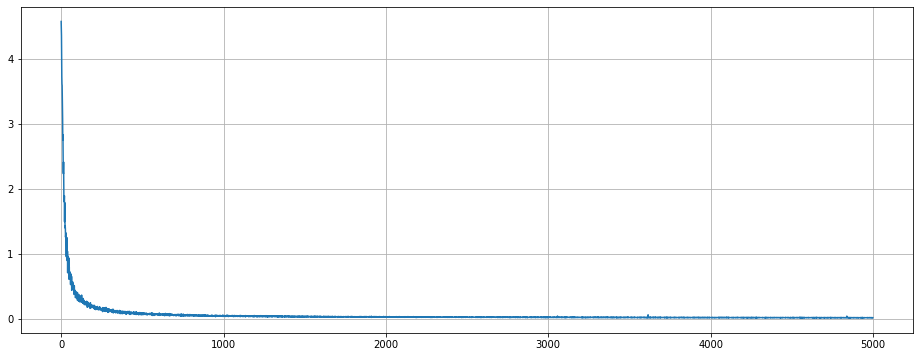

In [10]:
plt.plot(history.history['loss'])
plt.grid()

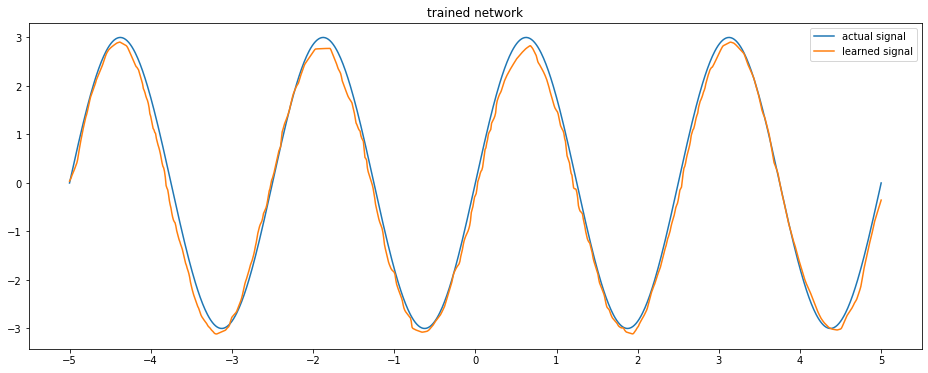

In [11]:
y_pred = mlp.predict(noisy_x)
plt.plot(clean_x, clean_y, label = 'actual signal')
plt.plot(noisy_x, y_pred, label = 'learned signal')
plt.title('trained network')
plt.legend()
_ = plt.xticks(np.linspace(-5,5,11))

## LSTM

In [39]:
def make_LSTM(hidden_nodes = 25):

    look_back = 1    
    model = Sequential()
    model.add(LSTM(hidden_nodes, input_shape = (1,1), return_sequences=True))
    model.add(LSTM(hidden_nodes))    
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss = 'mse')
    
    return model

### sequence on clean data

In [13]:
from sklearn.model_selection import train_test_split

#### data split / prep

In [93]:
x = clean_y[:-1]
y = clean_y[1:]
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, shuffle=False)

#### modelling

In [97]:
x_train.shape

(800,)

In [98]:
x_train.reshape(-1).shape

(800,)

In [99]:
lstm = make_LSTM(10)
history = lstm.fit (x_train.reshape(x_train.shape[0],1,1), y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 4.5154
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 4.3910
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 4.2363
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 4.0160
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 3.6701
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 3.1829
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 2.5390
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 1.8286
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 1.1550
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6420
Epoch 11/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3293
Epoch 12/200
25/25 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 13/200
25/25 [=================

25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 103/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 104/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 105/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 106/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 107/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 108/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 109/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 110/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 111/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 112/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 113/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 114/200
25/25 [=========

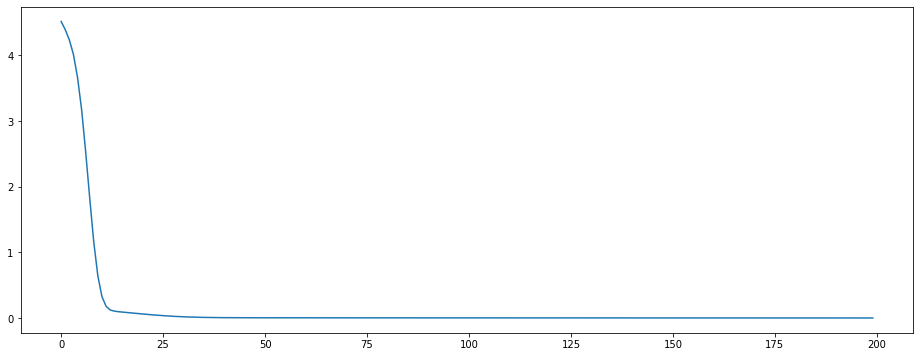

In [100]:
plt.plot(history.history['loss'])

Text(0.5, 1.0, 'clean sinusoid performance')

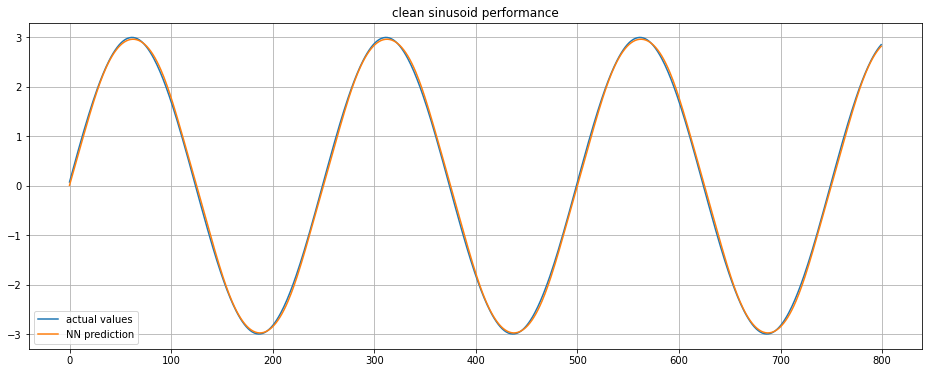

In [101]:
y_pred = lstm.predict(x_train.reshape(x_train.shape[0],1,1))
plt.plot(y_train, label = 'actual values')
plt.plot (y_pred, label = 'NN prediction')
plt.legend()
plt.grid()
plt.title ('clean sinusoid performance')


actually surprisingly good


In [102]:
def forward_prediction (model: Sequential, x, start_x = 0):
    model.reset_states()
    x0 = np.array([start_x])
    y = []
    for _ in range (x.shape[0]):
        y.append(model.predict(x0.reshape(x0.shape[0],1,1)))
        x0[0] = y[-1]
    return np.array(y)
    

In [106]:
y_pred = forward_prediction(lstm, clean_x, start_x=0.2)

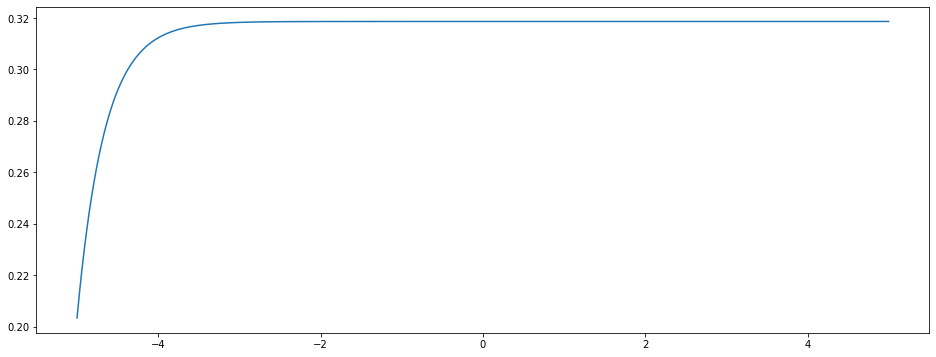

In [107]:
plt.plot(clean_x, y_pred.flatten())

pretty poor performance in closed-loop mode

Text(0.5, 1.0, 'clean sinusoid performance')

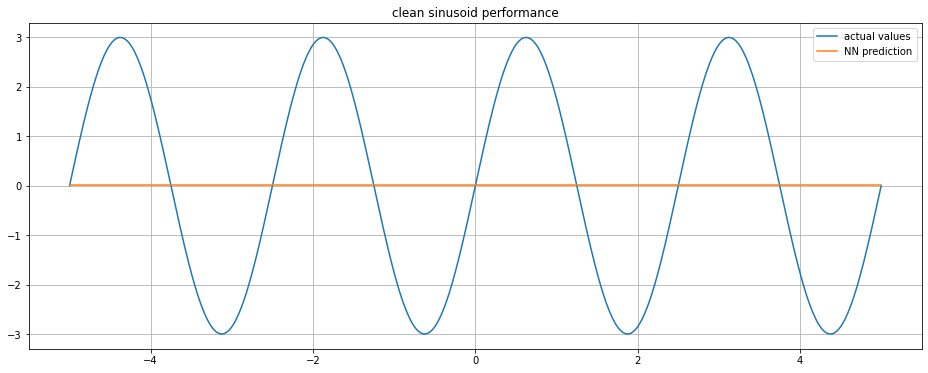

In [105]:
#y_pred = lstm.predict(clean_x.reshape(clean_x.shape[0],1,1))
plt.plot(clean_x, clean_y, label = 'actual values')
plt.plot (clean_x, y_pred.flatten(), label = 'NN prediction')
plt.legend()
plt.grid()
plt.title ('clean sinusoid performance')

Well that's absolutely crap. Let's play a bit...

### sequence on noisy data